# Question (Logistic Regression & ROC curve)
Application of Logistic Regression involving a direct mail promotion being used by Simmons Store.
Simmons owns and operate a national chain of women's apparel stores.
5000 copies of an expensive 4 colour sales catalogue has been printed, and each catalog includes a coupon that provide a dollars 50 discount on purchase of dollars 200  or more.
Catalogue are expensive and Simmon only want to send coupon to those customers who has highest probability of using the coupons

Management thinks that annual spending at Simmons Stores and whether a customer has a Simmons credit card are two variables that might be helpful in predicting whether a customer who receives the catalog will use
the coupon.

• Simmons conducted a pilot study using a random sample of 50 Simmons
credit card customers and 50 other customers who do not have a
Simmons credit card.

• Simmons sent the catalog to each of the 100 customers selected.

• At the end of a test period, Simmons noted whether the customer used
the coupon or not?


Note- All spending are in 1000 dollars

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data=pd.read_excel("C:/Sanket.f/Simmons.xls")
data

,Customer,Spending,Card,Coupon
0,1,2.291,1,0
1,2,3.215,1,0
2,3,2.135,1,0
3,4,3.924,0,0
4,5,2.528,1,0
...,...,...,...,...
95,96,3.318,0,0
96,97,2.421,1,0
97,98,6.073,0,0
98,99,2.630,1,0


In [6]:
data.head()

,Customer,Spending,Card,Coupon
0,1,2.291,1,0
1,2,3.215,1,0
2,3,2.135,1,0
3,4,3.924,0,0
4,5,2.528,1,0


In [7]:
# to get the value of mean, standard deviation, percentile etc. In short, used to get statistical details.
data.describe()

,Customer,Spending,Card,Coupon
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,3.333790,0.500000,0.400000
std,29.011492,1.741298,0.502519,0.492366
min,1.000000,1.058000,0.000000,0.000000
25%,25.750000,2.059000,0.000000,0.000000
50%,50.500000,2.805500,0.500000,0.000000
75%,75.250000,4.468250,1.000000,1.000000
max,100.000000,7.076000,1.000000,1.000000


In [8]:
# Now checking unique values in column
data["Coupon"].unique() #it gives unique value in given column

array([0, 1], dtype=int64)

In [9]:
# Now checking how many numbers od 1's and 0's are there in Coupon column
data["Coupon"].value_counts()

0    60
1    40
Name: Coupon, dtype: int64

### Now building model to train and test the data

In [17]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [11]:
#Assuming 'Card' and 'Spending' is independent variale. And 'Coupon' is dependent variable
x=data[['Card','Spending']]
y=data['Coupon'].values.reshape(-1,1) 
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=42)


In [12]:
x_train # check train size is 75

,Card,Spending
15,0,6.486
40,0,3.253
96,1,2.421
9,0,3.345
72,1,1.878
...,...,...
60,0,4.721
71,1,2.323
14,0,6.737
92,1,4.959


In [13]:
x_test # check test size is 25

,Card,Spending
83,1,3.995
53,1,3.386
70,1,2.678
45,0,2.118
44,0,3.566
39,0,1.911
22,0,2.118
80,1,5.501
10,1,2.140
0,1,2.291


In [18]:
y_train 

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]], dtype=int64)

In [19]:
y_test

array([[0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0]], dtype=int64)

In [20]:
len(x_train), len(y_train), len(x_test), len(y_test)

(75, 75, 25, 25)

In [21]:
Lreg=LogisticRegression(solver='lbfgs')
Lreg.fit(x_train, y_train.ravel()) #ravel() will return 1D array with all the input array element

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
y_predict=Lreg.predict(x_test)
y_predict #predicting y value using test data set

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0], dtype=int64)

In [23]:
y_predict_train=Lreg.predict(x_train)
y_predict_train #prediciting y value using training dataset of x

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [24]:
y_prob_train= Lreg.predict_proba(x_train)[:,1]
y_prob_train.reshape(1,-1) #Finding probability of all the value of training data set

array([[0.49622117, 0.32880793, 0.44329114, 0.33320924, 0.41456465,
        0.32890329, 0.3975043 , 0.66921229, 0.25844531, 0.63672372,
        0.29274386, 0.28466974, 0.5159296 , 0.41992276, 0.24342356,
        0.528514  , 0.47965107, 0.52805789, 0.33191449, 0.27457435,
        0.49179296, 0.63261616, 0.24690181, 0.47089452, 0.27842076,
        0.41663875, 0.36155602, 0.49970327, 0.23621636, 0.37860052,
        0.48809323, 0.28877877, 0.28563859, 0.37231882, 0.65309742,
        0.43807264, 0.33638478, 0.40406607, 0.23431177, 0.37282384,
        0.49970327, 0.39768396, 0.32880793, 0.25782472, 0.47393834,
        0.42878861, 0.26520939, 0.33320924, 0.54682499, 0.45446086,
        0.44326597, 0.4965167 , 0.60065954, 0.38989654, 0.49149447,
        0.27414424, 0.27785686, 0.67464141, 0.28195004, 0.48593427,
        0.38633222, 0.31373499, 0.42810085, 0.27418723, 0.44371771,
        0.41629601, 0.642004  , 0.6571001 , 0.44068025, 0.28195004,
        0.40217015, 0.43807264, 0.50977653, 0.57

In [25]:
y_prob=Lreg.predict_proba(x_test)[:,1]
y_prob.reshape(1,-1)
y_prob

array([0.52802946, 0.49516653, 0.45703306, 0.27712052, 0.34390047,
       0.26825171, 0.27712052, 0.607686  , 0.42836534, 0.43637155,
       0.31387455, 0.23676248, 0.45703306, 0.43602768, 0.37596116,
       0.44900317, 0.46952365, 0.68521935, 0.25167254, 0.47073304,
       0.42361093, 0.56580644, 0.52792177, 0.40302605, 0.27457435])

# Summary of Logistic Model

In [27]:
x=data[['Spending', 'Card']]
y=data['Coupon']

import statsmodels.api as sm
x1= sm.add_constant(x)
logit_model=sm.Logit(y, x1)
result=logit_model.fit()
print(result.summary())

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.604869
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Coupon   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Tue, 19 May 2020   Pseudo R-squ.:                  0.1012
Time:                        19:58:35   Log-Likelihood:                -60.487
converged:                       True   LL-Null:                       -67.301
Covariance Type:            nonrobust   LLR p-value:                  0.001098
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1464      0.577     -3.718      0.000      -3.278      -1.015
Spending       0.3416      0.

# Accuracy checking

### Calculating Accuracy Score using Confusion Matrix and also calculating optimum threshold value

In [28]:
from sklearn.metrics import accuracy_score
score= accuracy_score(y_test, y_predict)
score

0.76

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[15,  1],
       [ 5,  4]], dtype=int64)

In [30]:
tn, fp, fn, tp= confusion_matrix(y_test, y_predict).ravel()
print("True Negatives: ", tn)
print("True Positives: ", tp)
print("False Negatives: ", fn)
print("False Positive: ", fp)

True Negatives:  15
True Positives:  4
False Negatives:  5
False Positive:  1


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict)) 

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.80      0.44      0.57         9

    accuracy                           0.76        25
   macro avg       0.78      0.69      0.70        25
weighted avg       0.77      0.76      0.74        25



#Recall gives an idea about when its actually yes. how often does it predict yes.
#Precision tells us about when it predicts yes, how often is it correct
#Precision=tp/(tp+fp), for 1
#Accuracy=(tp+tn)/(tp+tn+fp+fn)
#Recall=tp/(tp+fn) for 1
#Fmeasure=(2*Recall*Precision)/(Recall+Precision)

Harmonic mean of Precision  and recall is used to indicate a balance between Precision and recall providing each equal weightage, ranges from 0 to 1. F1 score reaches its best value at 1(perfect precision and recall) and worst at 0.

In [42]:
Accuracy= (tp + tn)/(tp + tn + fp + fn)
print("Accuracy {:0.2f}".format(Accuracy))

Accuracy 0.76


#True Negative Rate

In [43]:
Specificity=tn/(tn+fp)
print("Specificity {:0.2f}".format(Specificity))

Specificity 0.94


#True Positive Rate

In [44]:
Sensitivity= tp/(tp+fn)
print("Sensitivity {:0.2f}".format(Sensitivity))

Sensitivity 0.44


## ROC Curve

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
log_ROC_AUC1=roc_auc_score(y_train, y_predict_train)
fpr1, tpr1, thresholds1=roc_curve(y_train, y_prob_train)
roc_auc1= auc(fpr1, tpr1)

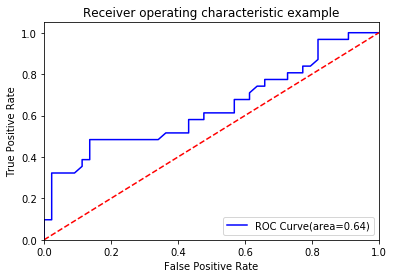

In [50]:
plt.figure()
plt.plot(fpr1, tpr1, color='blue', label='ROC Curve(area=%0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

Above graph is for train data set

Above graph we can see Area under curve is 0.64

Now we will check curve for y_test dataset

In [51]:
log_RUC_AUC= roc_auc_score(y_test, y_predict)
fpr, tpr, thresholds= roc_curve(y_test, y_prob)
roc_auc= auc(fpr, tpr)

In [52]:
fpr

array([0.    , 0.    , 0.    , 0.0625, 0.0625, 0.125 , 0.125 , 0.125 ,
       0.375 , 0.375 , 0.625 , 0.75  , 1.    ])

In [53]:
tpr

array([0.        , 0.11111111, 0.33333333, 0.33333333, 0.55555556,
       0.55555556, 0.66666667, 0.88888889, 0.88888889, 1.        ,
       1.        , 1.        , 1.        ])

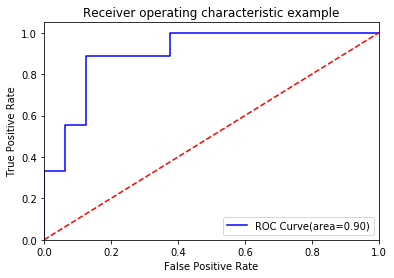

In [54]:
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC Curve(area=%0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

Above curve is for test data set

Now we will set different threshold vaues to check the true negative and true positive

Set threshold value at 0.35

In [56]:
from sklearn.preprocessing import binarize
y_predict_class1= binarize(y_prob.reshape(1, -1), 0.35)[0]
y_predict_class1

array([1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0.])

In [57]:
# Now converting values from float datatype to integer data type

y_predict_class1= y_predict_class1.astype(int)
y_predict_class1

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0])

In [59]:
confusion_matrix_2=confusion_matrix(y_test, y_predict_class1)
print(confusion_matrix_2)

[[8 8]
 [0 9]]


In [60]:
tn, fp, fn, tp= confusion_matrix(y_test, y_predict_class1).ravel()
print("True Negatives: ", tn)
print("True Positives: ", tp)
print("False Negatives: ", fn)
print("False Positive: ", fp)

True Negatives:  8
True Positives:  9
False Negatives:  0
False Positive:  8


In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_class1))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        16
           1       0.53      1.00      0.69         9

    accuracy                           0.68        25
   macro avg       0.76      0.75      0.68        25
weighted avg       0.83      0.68      0.68        25



Setting threshold value to 0.70

In [71]:
y_predict_class3= binarize(y_prob.reshape(1, -1), 0.70)[0]
y_predict_class3

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [72]:
# Now converting values from float datatype to integer data type

y_predict_class3= y_predict_class3.astype(int)
y_predict_class3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [73]:
confusion_matrix_3=confusion_matrix(y_test, y_predict_class3)
print(confusion_matrix_3)

[[16  0]
 [ 9  0]]


Classification report

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_class3)) 

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        16
           1       0.00      0.00      0.00         9

    accuracy                           0.64        25
   macro avg       0.32      0.50      0.39        25
weighted avg       0.41      0.64      0.50        25



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Optimum cuttoff point (threshold value)

In [78]:
from sklearn.metrics import roc_curve, auc

In [79]:
fpr, tpr, thresholds=roc_curve(y_test, y_prob)
roc_auc=auc(fpr, tpr)

In [87]:
import numpy as np
i=np.arange(len(tpr)) # index of df
roc=pd.DataFrame({'fpr' :pd.Series(fpr, index=i),'tpr' :pd.Series(tpr, index=i),'1-fpr' :pd.Series(1-fpr, index=i),'tf' :pd.Series(tpr-(1-fpr), index=i),'thresholds' :pd.Series(thresholds, index=i) })
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
7,0.125,0.888889,0.875,0.013889,0.457033


[]

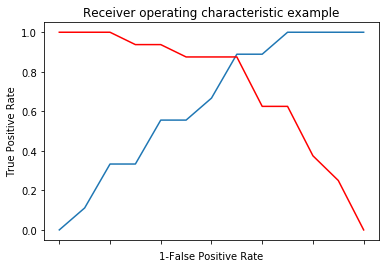

In [88]:
fig, ax=plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'],color='red')
plt.xlabel("1-False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
ax.set_xticklabels([])

Intersection is optimum threshold value

In [90]:
from sklearn.preprocessing import binarize
y_predict_class4= binarize(y_prob.reshape(1, -1), 0.45)[0]
y_predict_class4

array([1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 0.])

In [91]:
confusion_matrix_5=confusion_matrix(y_test, y_predict_class4)
print(confusion_matrix_5)

[[14  2]
 [ 1  8]]


In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_class4)) 

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.80      0.89      0.84         9

    accuracy                           0.88        25
   macro avg       0.87      0.88      0.87        25
weighted avg       0.89      0.88      0.88        25

